# **Notes**

+ Info about rat positions on the video and recording channels
    + w628 -> Neuropix 0 & 1; RIGHT on the video ===>>> RAT 2
    + w627 -> Neuropix 2 & 3; LEFT on the video (cf stickers on the vid) ===>>> RAT 1
    <br>
    <br>
+ Remarque on precising path to package: <br>
    + *vpp* contains 2 packages: *video_processing* & *utils*. <br>
    + In this notebook we will use functions form modules in *utils*. To import these modules we need to add path to *vpp* folder to th paths where python will look for imports.
    + It is possible to verify that folder we need is within the considered paths with **sys.path** command

In [1]:
import os
import sys
import glob
sys.path.append(os.path.join(os.getcwd(),"vpp"))

In [4]:
from utils import plot_mvm, mvm2txt, chopOffTail, rescalingNOF, syncFileCreator, plot_mvm_rescaled

## Erasing spaces from folder path

In [58]:
folders = glob.glob("/media/data-101/*/Record*")
print(len(folders))
print(folders)

7
['/media/data-101/2021-07-19_08-09-04/RecordNode101', '/media/data-101/2021-07-19_18-18-52/RecordNode101', '/media/data-101/2021-07-21_00-25-18/Record Node 101', '/media/data-101/2021-07-18_19-30-44/Record Node 101', '/media/data-101/2021-07-21_11-06-32/Record Node 101', '/media/data-101/2021-07-20_12-54-35/Record Node 101', '/media/data-101/2021-07-21_23-11-38/Record Node 101']


In [50]:
folders = glob.glob("/media/data-101/*")
print(len(folders))
print(folders)

9
['/media/data-101/2021-07-19_08-09-04', '/media/data-101/lost+found', '/media/data-101/2021-07-19_18-18-52', '/media/data-101/2021-07-21_00-25-18', '/media/data-101/2021-07-18_19-30-44', '/media/data-101/2021-07-21_11-06-32', '/media/data-101/2021-07-20_12-54-35', '/media/data-101/2021-07-21_23-11-38', '/media/data-101/20210721002518_working']


In [59]:
for f in folders:
    new_f = f.replace(" ","")
    print(new_f)
    try:
        os.rename(f, new_f)
    except FileNotFoundError:
        continue

/media/data-101/2021-07-19_08-09-04/RecordNode101
/media/data-101/2021-07-19_18-18-52/RecordNode101
/media/data-101/2021-07-21_00-25-18/RecordNode101
/media/data-101/2021-07-18_19-30-44/RecordNode101
/media/data-101/2021-07-21_11-06-32/RecordNode101
/media/data-101/2021-07-20_12-54-35/RecordNode101
/media/data-101/2021-07-21_23-11-38/RecordNode101


# **RAT 2 a.k.a. W628**

In [3]:
w628 = "/media/data-119/Rat628-20210714_1/"

## session 1 of 14th of July

Index(['frame_nb', 'millisec', 'mvm_rat1', 'mvm_rat2', 'mvmr1_normalized',
       'mvmr2_normalized'],
      dtype='object')


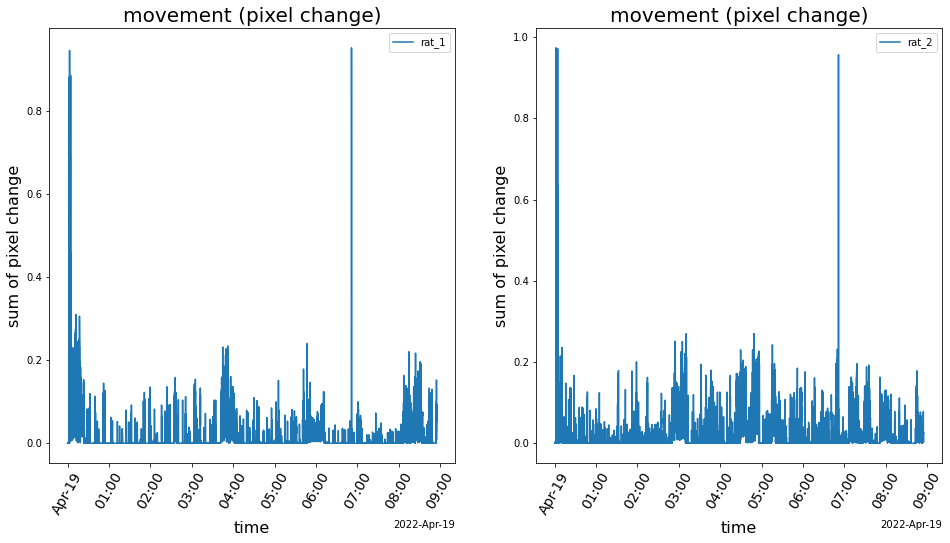

In [14]:
plot_mvm(path = os.path.join(w628, "acA1300-60gmNIR__21471690__20210714_122428913.csv"),
             resample_freq = '1S', #you can set resampling freq: '1T' for 1 minute
             plot_all =True,
             start={"hours": 2, "minutes": 0, "seconds": 0},
             dt={"hours": 1, "minutes": 0, "seconds": 0},
             ylim=1,
             save=False)

### Create sync file

In [5]:
# Input : path to FOLDERS
# you can find this info in /media/data-116/Neuropixels Info/Neuropixel_Rats.ods

syncFileCreator(TTL2_folder = "/media/data-102/2021-07-14_12-24-22/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-14_12-24-22/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

Video was recorded from second 6.0336.


### Saving movement var in txt file
+ and calculate how much to crop from video signal in the end if the ephys was stopped first (before camera)

In [9]:
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

Video duration: 32095.36
Sum of diffs: 32095.655600000002.
Video signal is -0.2956000000012864 seconds longer than sync_file, which corresponds to -7 number of frames


## **This recording is weird** 
- on LFP (.dat) file, the recording lasts 32137.5 sec, which is 36 longer than video duration : 32095 (AND SUM OF DIFFERENCES on TTL : 32905) - even when the beginning of signal, when the video wasn't recording is substracted (6 secs). 

## May have to 'cut' the end of LFP. (not consider it)!

### Rescaling number of frames

In [11]:
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

202 frames were deleted.


### Plotting rescaled movement
+ check with video wether it is well synchronized

0.3902598391730994


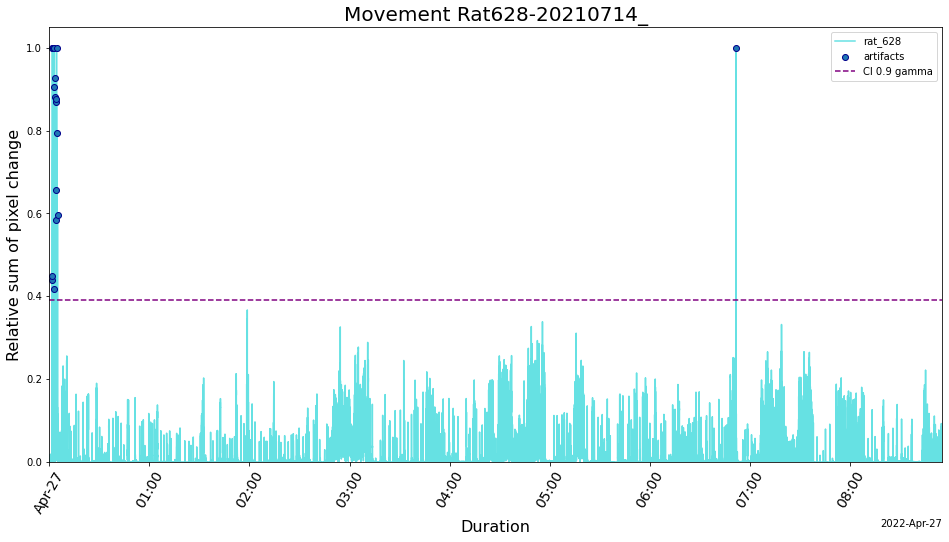

In [6]:
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.9)

## session 3 of 14th of July 

+ session 2 is a short + empty ttl

In [19]:
w628 = "/media/data-119/Rat628-20210714_2/"

Index(['frame_nb', 'millisec', 'mvm_rat1', 'mvm_rat2', 'mvmr1_normalized',
       'mvmr2_normalized'],
      dtype='object')


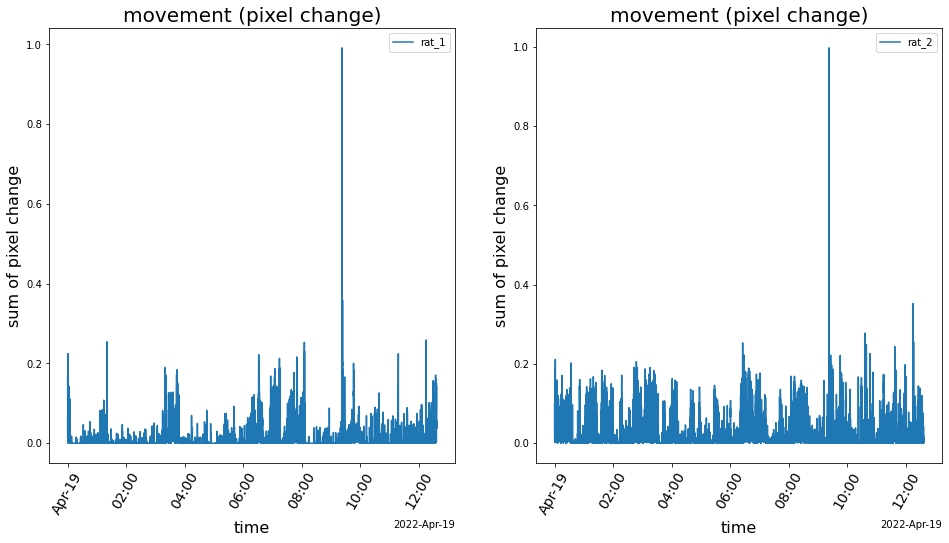

In [19]:
plot_mvm(path = os.path.join(w628, "acA1300-60gmNIR__21471690__20210714_212500309.csv"),
             resample_freq = '1S', #you can set resampling freq: '1T' for 1 minute
             plot_all = True,
             start={"hours": 2, "minutes": 0, "seconds": 0},
             dt={"hours": 1, "minutes": 0, "seconds": 0},
             ylim=1,
             save=False)

### Saving movement var in txt file

In [13]:
# Input : path to FOLDERS
# you can find this info in /media/data-116/Neuropixels Info/Neuropixel_Rats.ods

syncFileCreator(TTL2_folder = "/media/data-102/2021-07-14_21-24-12/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-14_21-24-12/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

Video was recorded from second 47.5092.


In [14]:
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

Video duration: 45407.28
Sum of diffs: 45395.686.
Video signal is 11.593999999997322 seconds longer than sync_file, which corresponds to 289 number of frames


### Rescaling number of frames

In [15]:
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

298 frames were deleted.


0.8309591464799309


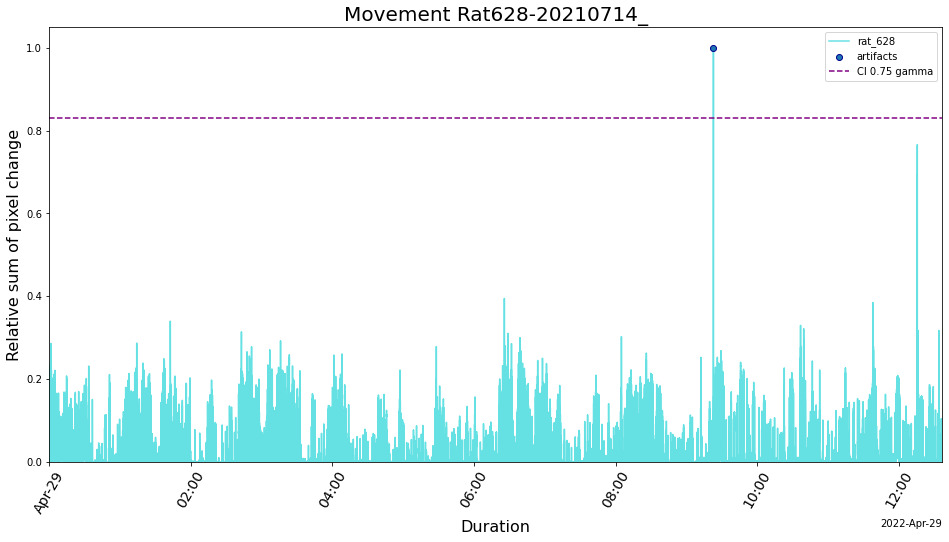

In [21]:
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.75)

## session 2 (1 is broken) of 15th of July

+ on the right => rat 2

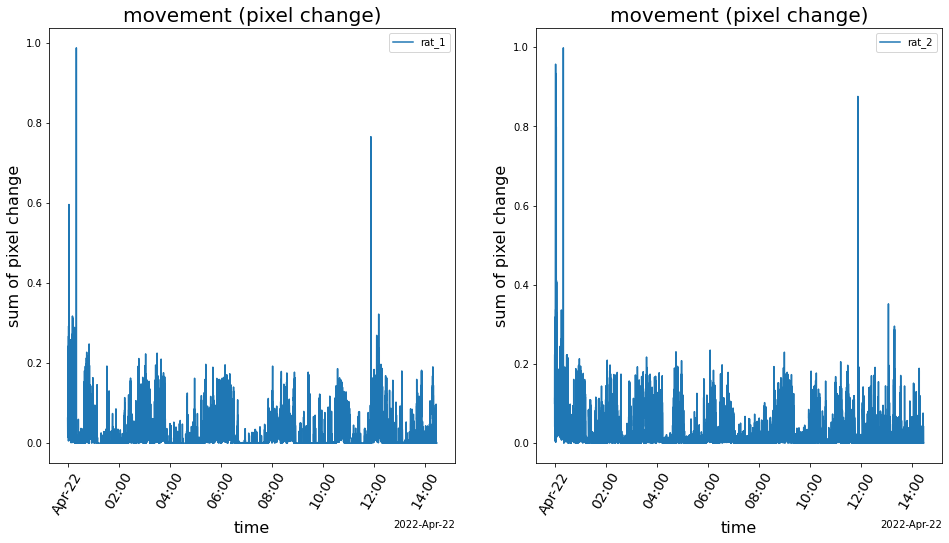

In [11]:
plot_mvm(path = os.path.join(w628_15, "acA1300-60gmNIR__21471690__20210715_185541853.csv"),
             resample_freq = '1S', #you can set resampling freq: '1T' for 1 minute
             plot_all = True,
             start={"hours": 1, "minutes": 25, "seconds": 0},
             dt={"hours": 0, "minutes": 10, "seconds": 0},
             ylim=1,
             save=False)

Video was recorded from second 2.8612.
Video duration: 51989.44
Sum of diffs: 51989.4304.
Video signal is 0.00960000000486616 seconds longer than sync_file, which corresponds to 0 number of frames
341 frames were deleted.
0.4553858218162495


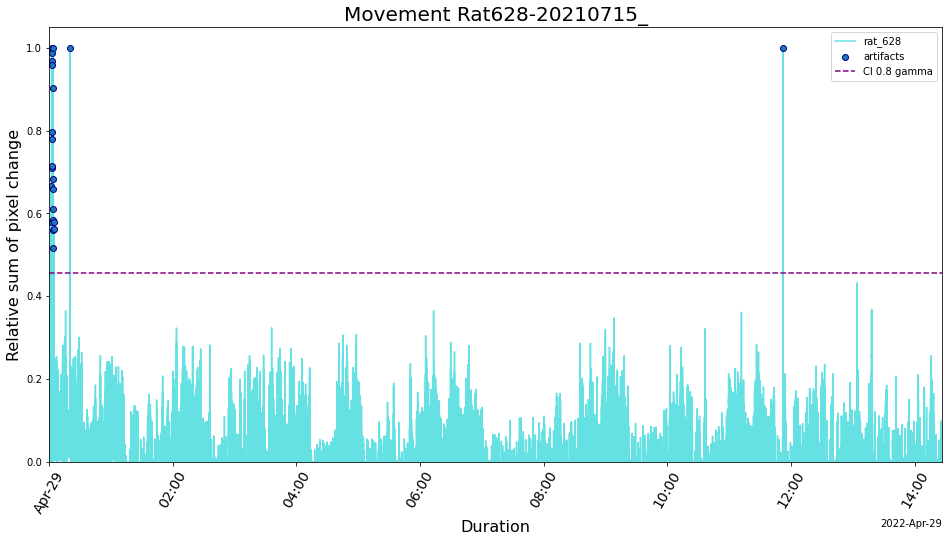

In [22]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210715_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-15_18-55-38/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-15_18-55-38/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.8)

## session 1 of 16th of July


In [25]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210716_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-16_10-24-13/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-16_10-24-13/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

0.5025173501127472


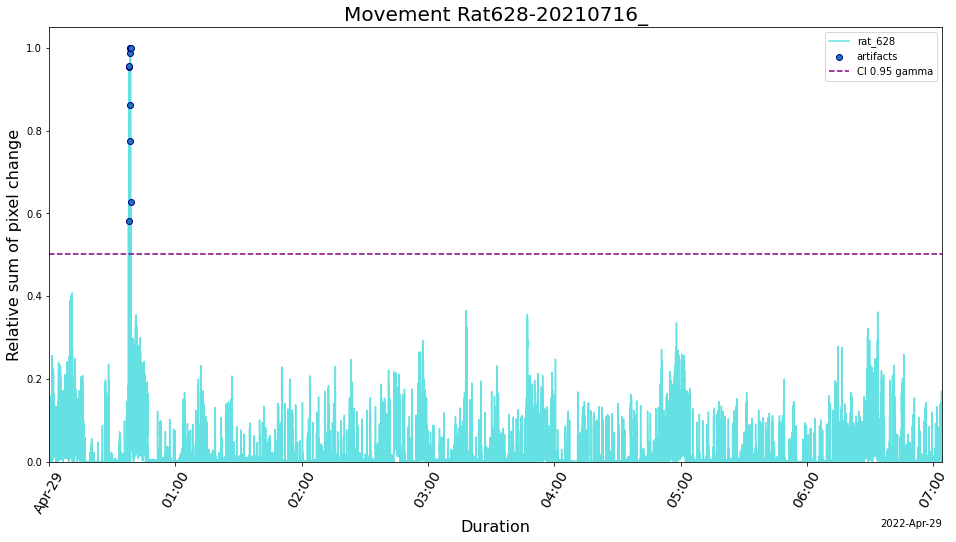

In [26]:
# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.95)

## session 2 of 16th of July


In [27]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210716_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-16_17-43-44/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-16_17-43-44/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

0.465342271420893


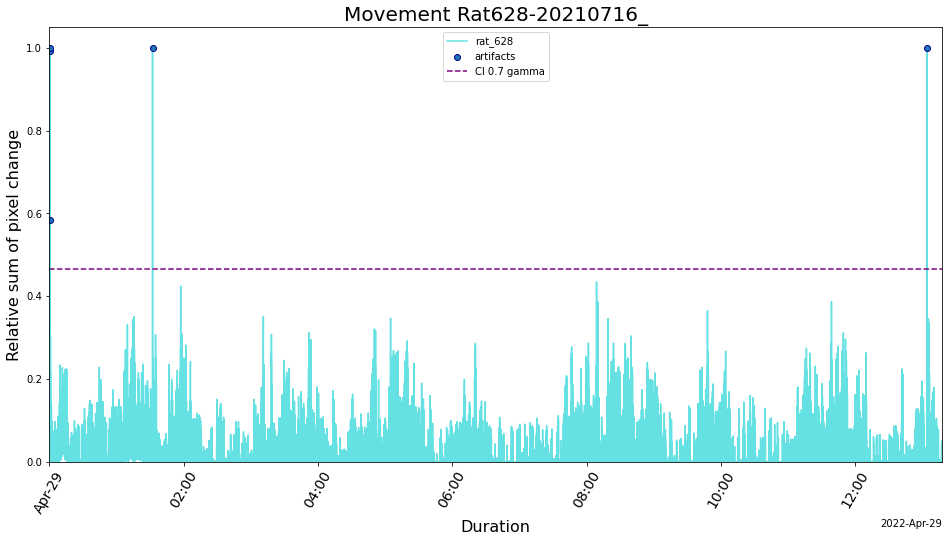

In [29]:
# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.70)

## session 1 of 17th of July


In [30]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210717_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-17_07-09-45/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-17_07-09-45/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

1.1994007632738455


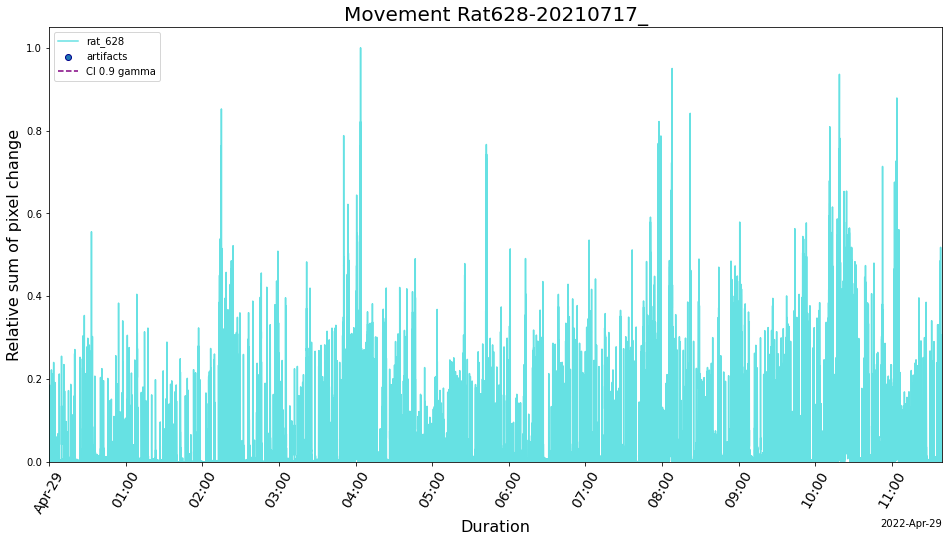

In [31]:
# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 17th of July

Video was recorded from second 3.1684.
Video duration: 46712.24
Sum of diffs: 46712.326799999995.
Video signal is -0.0867999999973108 seconds longer than sync_file, which corresponds to -2 number of frames
310 frames were deleted.
1.4282703018212817


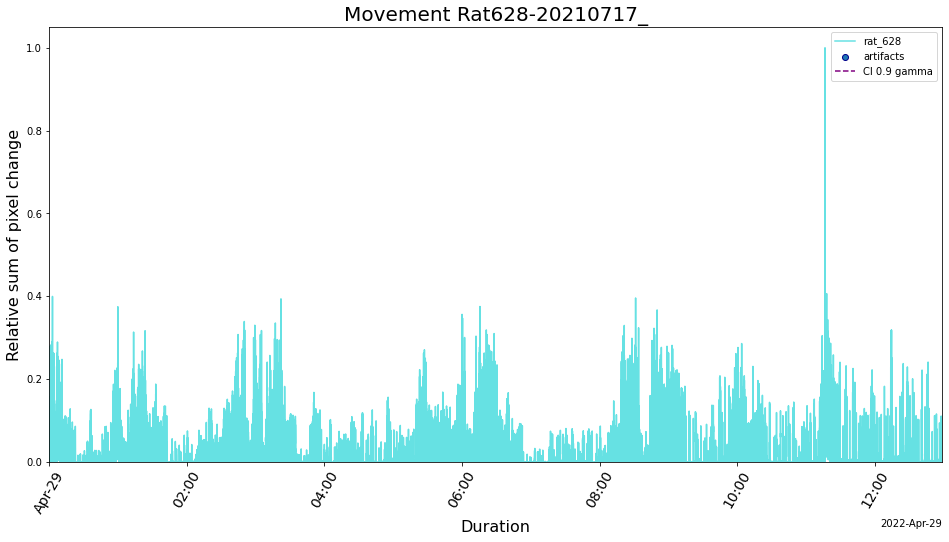

In [32]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210717_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-17_19-31-19/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-17_19-31-19/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 1 of 18th of July

Video was recorded from second 63.5196.
Video duration: 38648.36
Sum of diffs: 38649.3664.
Video signal is -1.0063999999983935 seconds longer than sync_file, which corresponds to -25 number of frames
228 frames were deleted.
0.8244074344175331


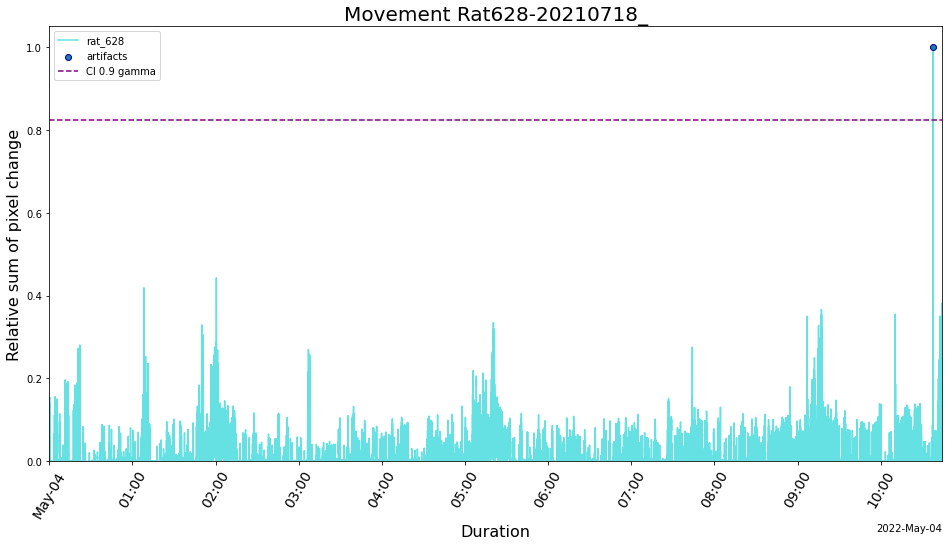

In [34]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Maeva_mvm/Rat628/Rat628-20210718_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-18_08-37-09//RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-18_08-37-09//RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 18th of July

Video was recorded from second 3.0956.
Video duration: 43652.52
Sum of diffs: 43652.9628.
Video signal is -0.44280000000435393 seconds longer than sync_file, which corresponds to -11 number of frames
275 frames were deleted.
1.5997594870007439


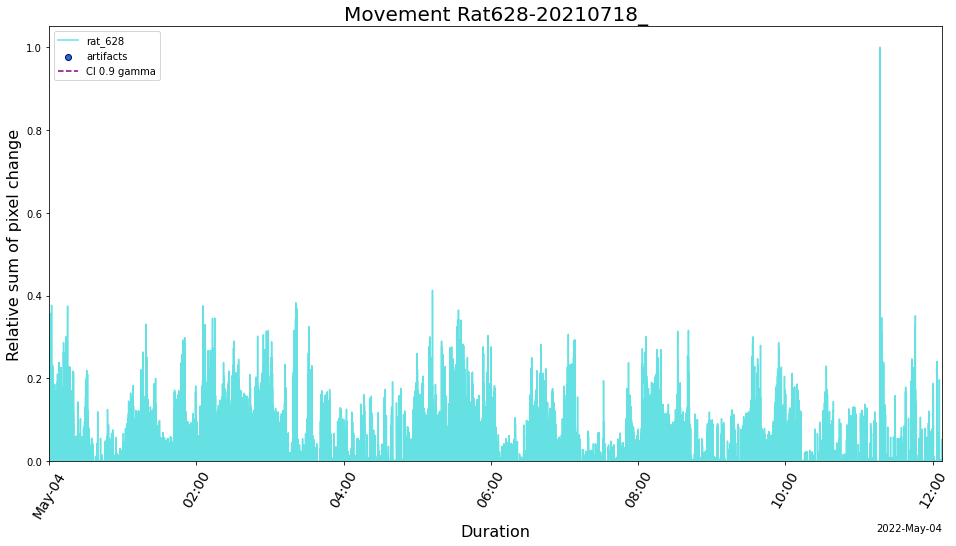

In [60]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Maeva_mvm/Rat628/Rat628-20210718_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-18_19-30-44/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-101/2021-07-18_19-30-44/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 1 of 19th of July

Video was recorded from second 50.5072.
Video duration: 36436.2
Sum of diffs: 36436.2664.
Video signal is -0.06640000000334112 seconds longer than sync_file, which corresponds to -1 number of frames
409 frames were deleted.
0.6664156455564717


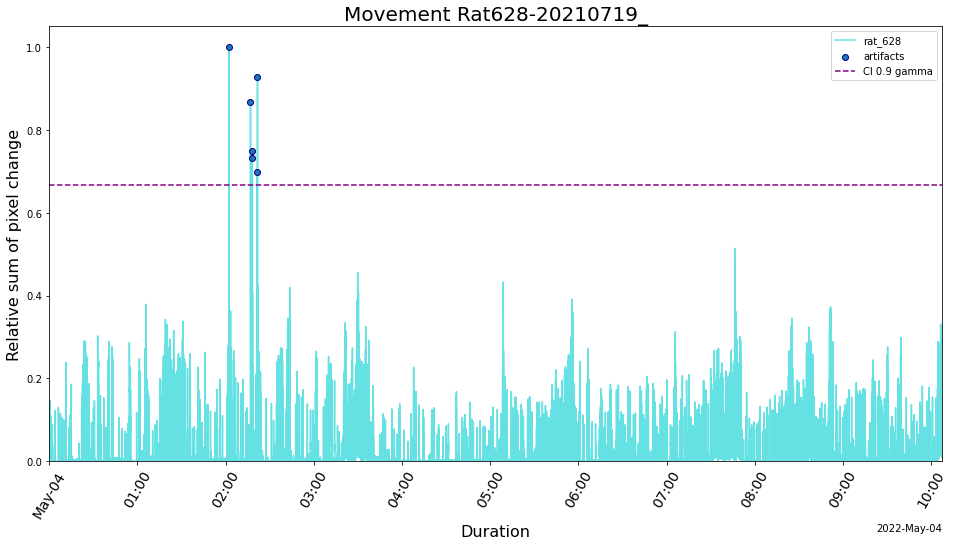

In [61]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Maeva_mvm/Rat628/Rat628-20210719_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-19_08-09-04//RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-101/2021-07-19_08-09-04/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 19th of July

Video was recorded from second 26.956.
Video duration: 50504.44
Sum of diffs: 50505.3688.
Video signal is -0.9287999999942258 seconds longer than sync_file, which corresponds to -23 number of frames
308 frames were deleted.
1.3659883846512408


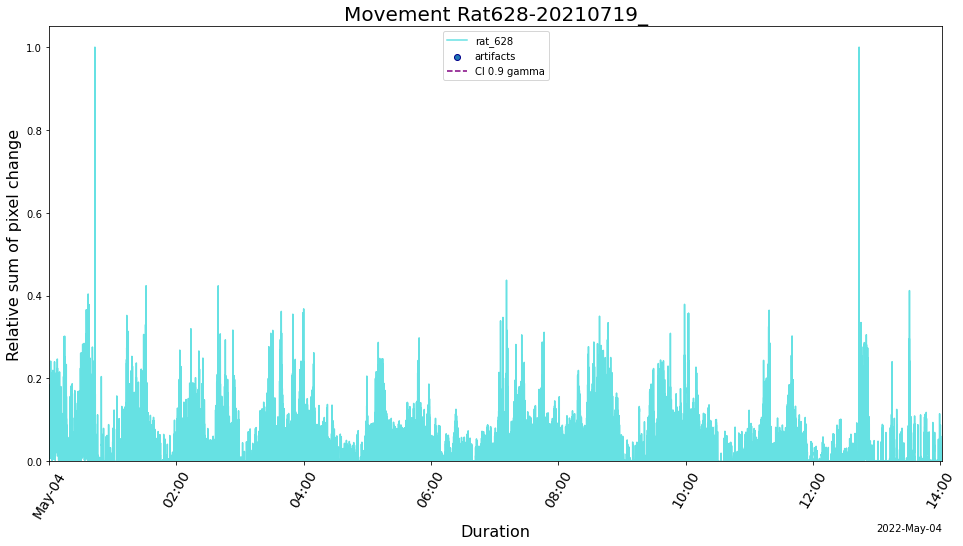

In [62]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Maeva_mvm/Rat628/Rat628-20210719_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-19_18-18-52/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-101/2021-07-19_18-18-52/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

Rethink how much it should be considered as limit for over-running the LFP vs video. (this one is almost 1 sec)
+ consider coming back to it and correct it later.

## session 1 of 20th of July

Video was recorded from second 19.2076.
Video duration: 41092.88
Sum of diffs: 41092.8868.
Video signal is -0.006800000002840534 seconds longer than sync_file, which corresponds to 0 number of frames
269 frames were deleted.
1.1439322572286432


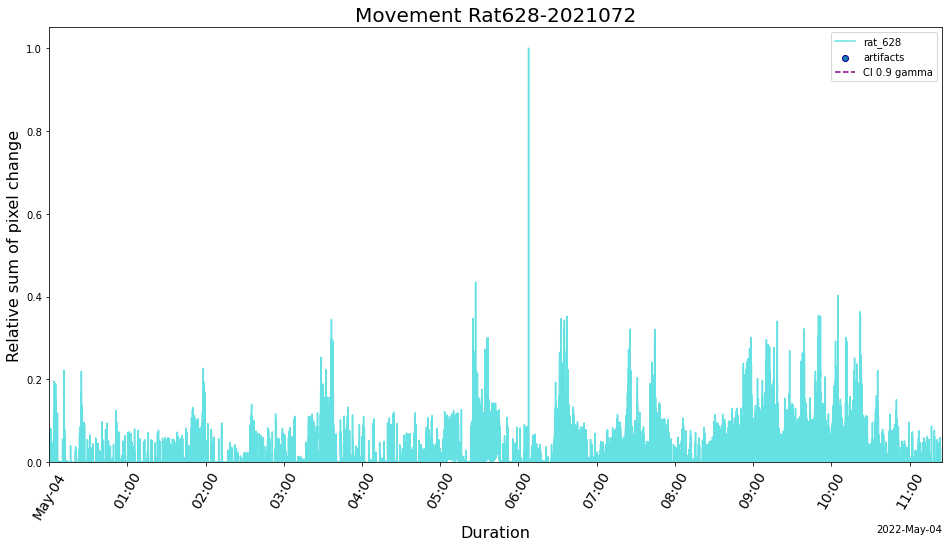

In [63]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Maeva_mvm/Rat628/Rat628-20210720/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-20_12-54-35/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-101/2021-07-20_12-54-35/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 1 of 21th of July

Video was recorded from second 33.8884.
Video duration: 36679.88
Sum of diffs: 36680.52880000001.
Video signal is -0.6488000000099419 seconds longer than sync_file, which corresponds to -16 number of frames
224 frames were deleted.
1.1416269257742717


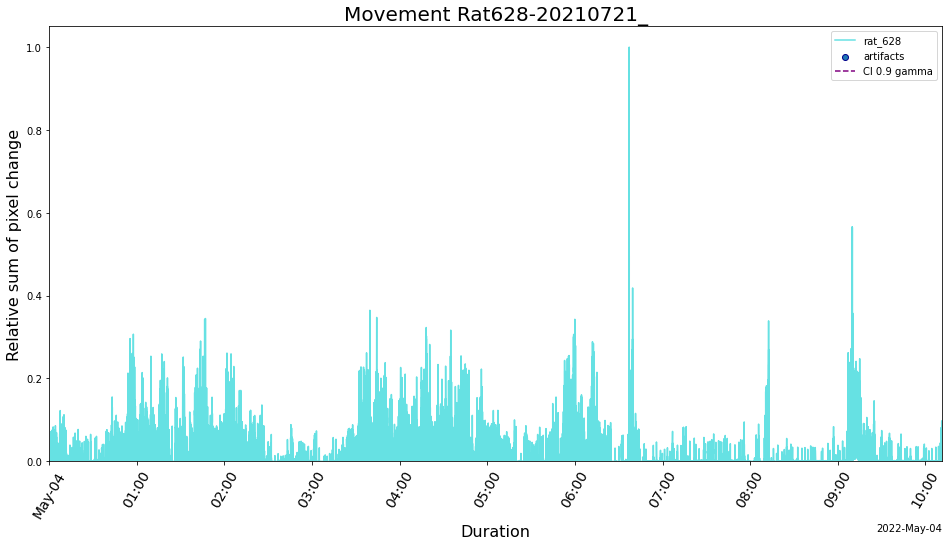

In [64]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Maeva_mvm/Rat628/Rat628-20210721_1//"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-21_00-25-18//RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-101/2021-07-21_00-25-18//RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 21th of July

Video was recorded from second 6.9128.
Video duration: 43098.4
Sum of diffs: 43098.8964.
Video signal is -0.4963999999963562 seconds longer than sync_file, which corresponds to -12 number of frames
270 frames were deleted.
0.2522376657297087


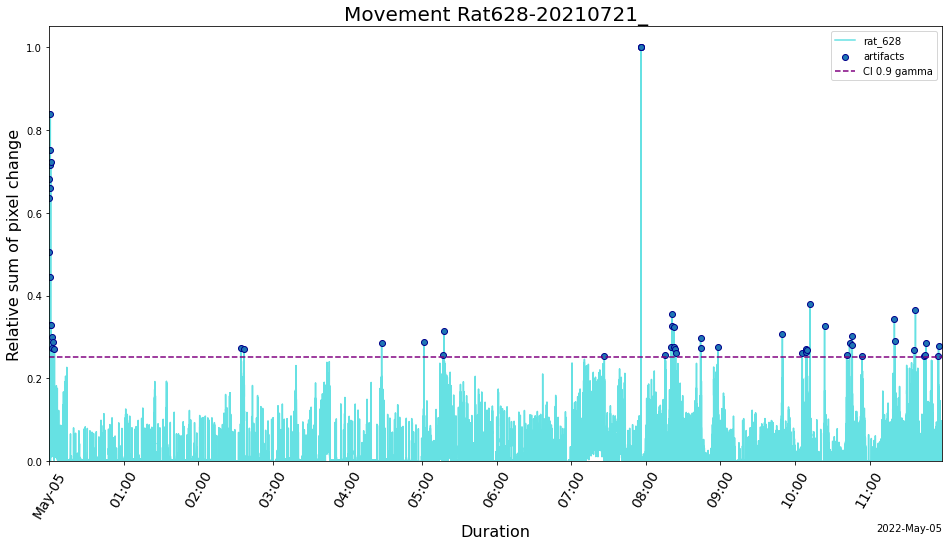

In [65]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Maeva_mvm/Rat628/Rat628-20210721_2//"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-21_11-06-32//RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-101/2021-07-21_11-06-32//RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 3 of 21th of July

Video was recorded from second 33.7444.
Video duration: 41133.12
Sum of diffs: 41133.1376.
Video signal is -0.017599999999220017 seconds longer than sync_file, which corresponds to 0 number of frames
269 frames were deleted.
0.836890260224948


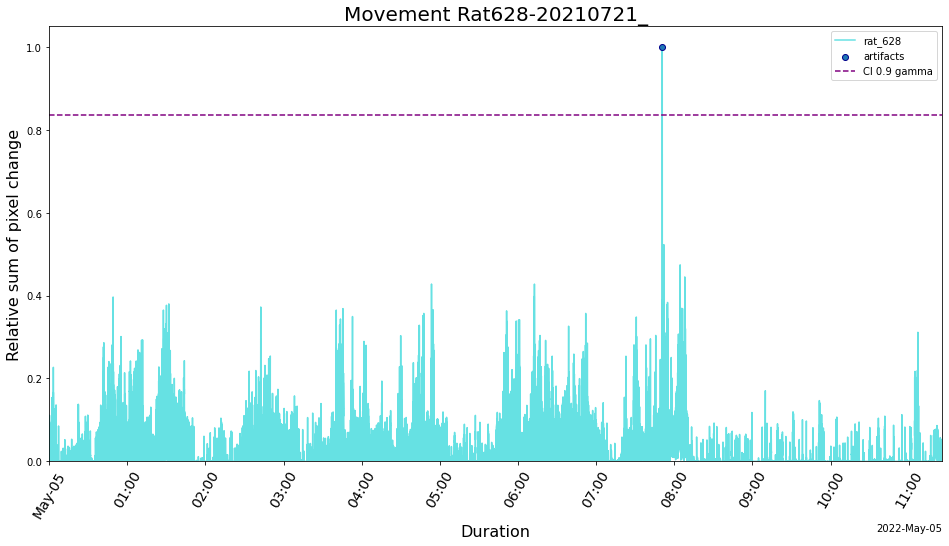

In [66]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Maeva_mvm/Rat628/Rat628-20210721_3/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-21_23-11-38/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-101/2021-07-21_23-11-38/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)